# Chapter II - Taming Infinity with Generating Functions and Z-Transform

### The Equations for our Infinite Grid Network

Lets look again onto our infinite grid of resistors:

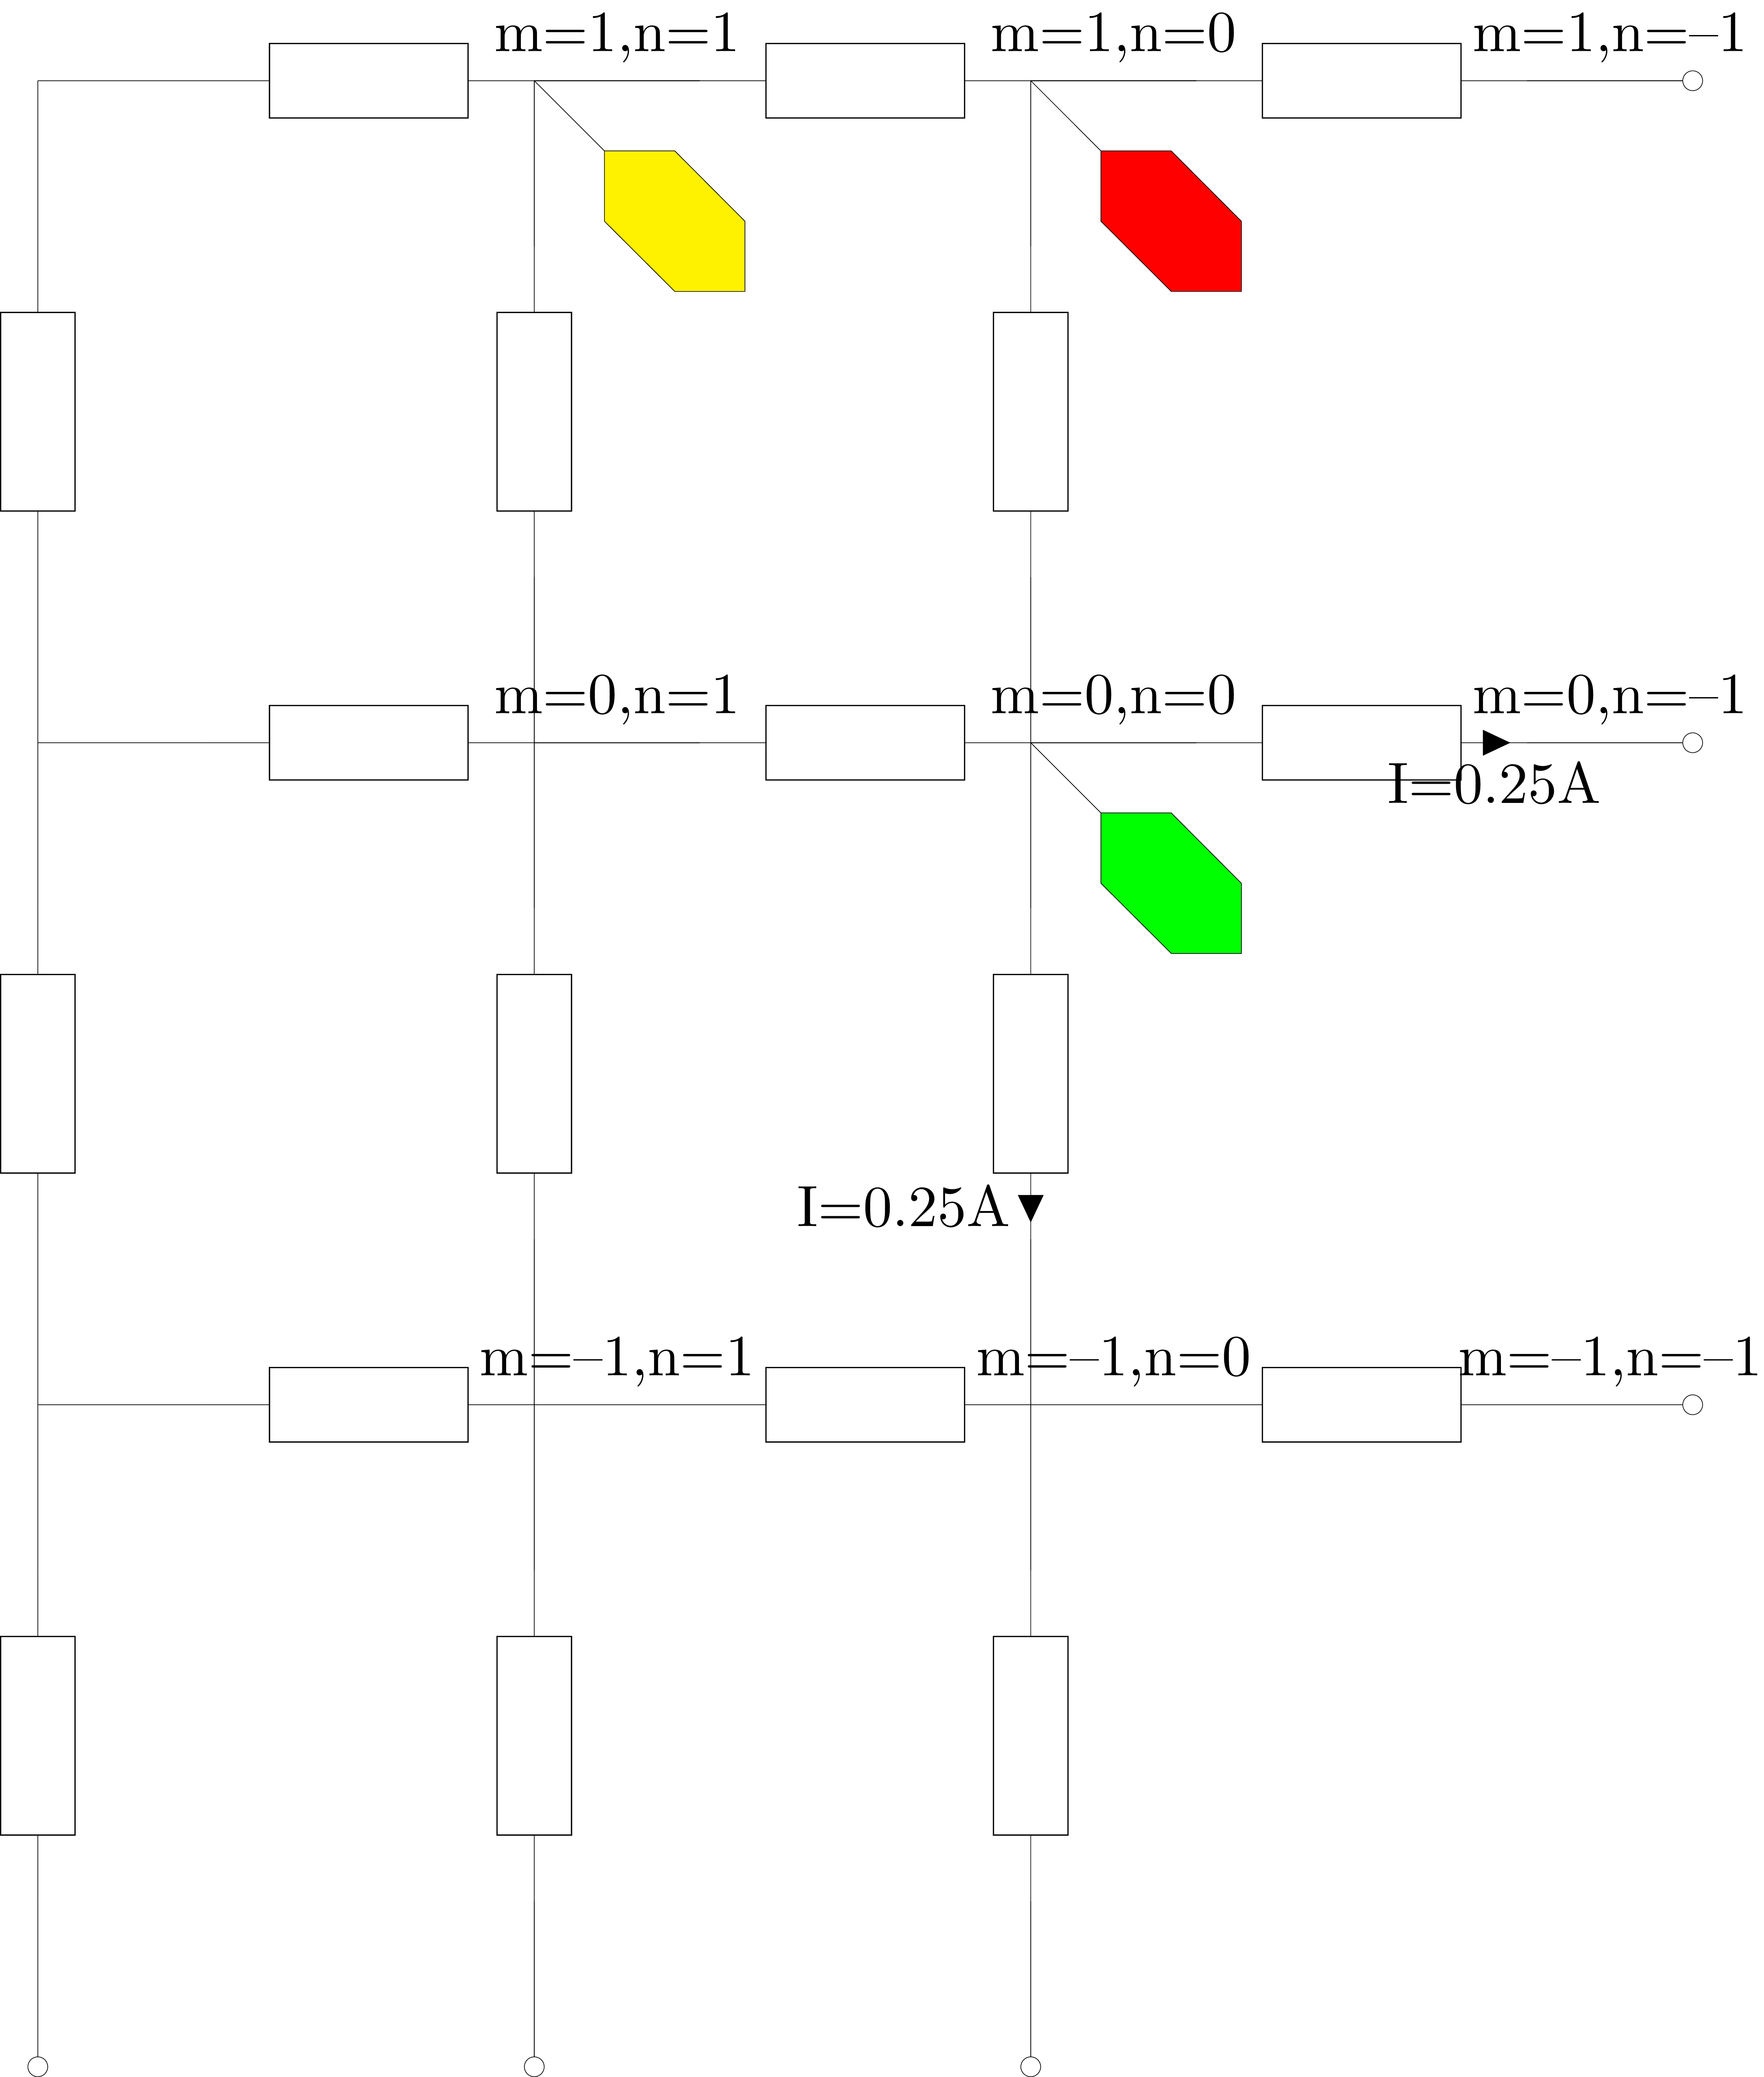

In [1]:
from chapter0drawgrid import drawgrid
drawgrid(3)

If we denote the voltate (the potential) in each node with \$ U_{n,m} \$ e.g. the point in the center with \$ U_{0,0} \$ and if we assume each resistor has \$ R=1\Omega \$ again then in each of the nodes \$ m,n \$ we get:


\$ I_{north}+I_{south} +I_{west} + I_{east} = 0 \$

Except for the central point (green) where we inject our own current \$ I=1A \$ from outside.

If we write the currents in terms of potential difference over resistance, that is, e.g.

$$ I_{north} = U_{m,n} - U_{m+1,n} $$ 

Then we get for all 4 currents in each node:


$$ R*(I_{north}+I_{south} +I_{west} + I_{east}) =  (U_{m,n} - U_{m+1,n}) +  (U_{m,n} - U_{m-1,n}) + (U_{m,n+1} - U_{m,n}) + (U_{m,n-1} - U_{m,n})  $$

Or

$$ 4*U_{m,n}-U_{m+1,n}-U_{m-1,n}-U_{m,n+1}-U_{m,n-1} = 0 $$

Except where \$ m=0, n=0 \$ and if we change the sign on both sides:

$$ -4*U_{m,n}+U_{m+1,n}+U_{m-1,n}+U_{m,n+1}+U_{m,n-1} = -I_{in}*R = -1 $$

This is the so called **discrete laplacian** and it has uses in many places in physics and mathematics.

$$ \nabla^{2} F(m,n) = -4*F(m,n)+F(m+1,n)+F(m-1,n)+F(m,n+1)+F(m,n-1) \$$ 


### The discrete laplacian 

$$ \nabla^{2} F_{m,n} = -4*F_{m,n}+F_{m+1,n}+F_{m-1,}+F_{m,n+1}+F_{m,n-1} = \mathbf{L} F_{m,n} \$$ 

This is e.g. used when **approximating** the continuous laplace equation that is e.g the heat equation and millions of other places. It is used in computer grafics to dedect edges in pictures. When not much changes in a picture then the above some is small or zero. If there is a sharp edge then there will be a huge diffence between one pixel and its neighbors, etc..

So the good news is: Solving this has many applications and thus there should be plenty of literature to get solutions. Unfortunately not all of them are really easy to read. When initially googling I did not find that much. It was complicated to read and often the author pulled in some results without explaining where it came from. E.g. "out of the blue".

So this is the motivation for this text and video.

Note: The nabla \$ ∇ \$ is usually used for the continous case (that is differential equation instead of difference equations, but somtimes also used for the difference versions. I will somtimes use the symbol \$ \mathbf{L} \$ instead to denote this operation.

What makes solving the equation hard is that we have a 2 dimensional equation here. So before further looking at 2D equation lets get our feet wet with some 1D difference equations:


# Learning to solve 1 dimensional difference equations

### Usecase of difference equation: Fibonacci Numbers

Often we want to solve equation of differences of nearby values. E.g. think of the famouse **Fibonacci Numbers**:


$$ F_{n+2}=F_{n}+F_{n+1} $$

usually with the initial condition of \$ F_0=0, F_1 = 1 \$

### Usecase for difference equations: Digital Filters

When the headphones in your ear do digital noise canceling there is digital filter running that uses the last few input values that it got over the microphon \$ x_n, x_{n-1}, x_{n-2}, \ldots \$ to produce an output vale \$ y_n \$. Usually also the last output values are remembered and also used to calculate the next value: 

$$ y_n = \frac{1}{a_0}(b_0 x_n + b_1 x_{n-1} + \ldots b_P x_{n-P} - a_1 y_{n-1} -a_2 y_{n-2}   \ldots - a_Q y_{n-Q} ) $$

Depending on the coefficience \$ b_0, b_1, \ldots b_P \$ and \$ a_0, a_1, \ldots, a_Q \$ this will filter out different frequencies in the sampled input signal. To determin these coefficients is an engineering task for electrical engineers.

Useful Links for generating functions and Z-transform:

* Discrete Mathematics (Levin): https://math.libretexts.org/Bookshelves/Combinatorics_and_Discrete_Mathematics/Discrete_Mathematics_(Levin)/5%3A_Additional_Topics/5.1%3A_Generating_Functions

* A short table of generating functions and related formulas, Robert M. Zif: https://arxiv.org/pdf/1102.0757.pdf 


## Tools for solving these difference equations: generating functions and Z-Transform


These two tools are rather similar and it is kind of strange that they both independently exist and society has not agreed on just using one of them. Mathematicans mostly use the generating functions and electrical engneers mostly use Z-Transform. Here you will learn the basics of both:



### Generating Functions

Lets assume we have a series of numbers \$ a_0, a_1, a_2, \ldots a_N \$ then we could keep track of those numbers by defining a polinomial \$ p(x) \$ with exactly these numbers as coefficients:

$$ a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots + a_N x^N  = p(x) $$

In some sense the x here is only a **placeholder** to distinguish between the coefficients. We could as well write them just as a list of as a vector. But having them as a polinomial brings some convenience. E.g. shifting all numbers by 3 positions to the right would be:

$$ q(x) = x^3 p(x)  $$

The polinomial q has the same coefficients as p but each coefficient is shifted to the right by 3 positions. 

Often these are used in combinatorics.

E.g. You play a game where you draw from pot and you can either win nothing (90% chance), or you win 1€ (8% probability) or you can with 5€ with a probability of 2%.

Now you are allowed to play 10 times. What is the distribution of outcomes?

After the first round you get:


In [2]:
from sympy import *
a,F,x=symbols("a F x")

p=0.9+0.08*x+0.02*x**5
p

where the exponent on x is the amount of money you have and the coefficient denotes the propability


In [3]:
expand(p*p)

In [4]:
series(x/(x-1)**2)

So after the second round your chances of going home with 10€ are 0.02*0.02. Lets see what we get after 8 rounds:



In [5]:
round8=expand(p**8)
round8

In [6]:
r8=lambdify(x,round8)
r8(1)

As we can see: All the changes sum up to 1. This is what we get when we evaluate the polinomial at 1. What is our expected return? If we differentiate the polinomial for each 
term we get \$ p' = \sum{ k a_k x^{k-1} } \$ where k is the amount of € we get and \$ a_k \$ is the propability. Thus we get the expected value:


In [7]:
round8prime=round8.diff(x)

round8prime

In [8]:
simplify(round8prime.subs(x,1))

So after eight rounds we will have €1.44 on average. Which we could have calculated easier since the average payout in each round is 

$$ 0.02*5€ + 0.08*1€ = 0.18€ $$

So after 8 rounds we have \$ 8*0.18 = 1.44 \$ But still you can see that all of this is extremly useful for many combinatorics problems. 

### To infinity and beyond

Now nothing stops us from limiting this method to a finite number of terms. We can extend the idea to infinite seriers. So we get kind of a Taylor series. E.g.: if we have

$$ 1 + \frac{1}{2} x + \frac{1}{2^2} x^2 + \frac{1}{2^3} x^3 + \ldots $$  

This is a geometric series. The coefficients follows the equation

$$ a_{n+1} = k a_n  $$
$$ k=0.5 $$ 

If 

$$ F(x) = a_0 + a_1 x + a_2 x^2 + \ldots $$
$$ k x F(x) = a_0 k x + a_1 k x^2 + \ldots $$
$$ k x F(x) = a_1  x + a_2 A x^2 + \ldots $$

Remember shiftint the values to the right is just multiplication by x. So we have

$$ F-x k F = a_0 = 1 $$ or

$$ F(x) = \frac{1}{1-kx} $$

In our case k would be 0.5. If we set k to 1 we would get the seqence of all 1s:

$$ \frac{1}{1-x} = 1+x+x^2+ \ldots $$

So this only converages for \$ x < 1 \$ but keep in mind: We are not that much interested in convergenc. Even for a diverging sequence we can calculate the terms by long division.

In [9]:
series(1/(1-x),x,0,10)

In [10]:
series(1/(1-0.5*x),x,0,10)

So the magic here is that most useful sequences (as they often arise from difference equations anyways) have usefull represntations in the form of generating functions.

See e.g.: https://aofa.cs.princeton.edu/30gf/

Here a few examples executed via sympy:

In [11]:
b,c,=symbols("b c")

In [12]:
f=1/(1-c*x)
f

In [13]:
f.series(x)

In [14]:
f=x/(1-x)**2
f

In [15]:
f.series()

In [16]:
f=exp(x)
f

In [17]:
f.series()

Now with this knowledge lets try to get a grip on the **Fibonacci** numbers:

$$ F_{n} = F_{n-1} + F_{n-2} $$

translates into

$$ f = f x + fx^2 +p(x)  $$

Where \$ p(x) \$ is a polinomial that we use to set the intital conditions. In this case we want the starting values for \$ F_0 = F_1 = 1 \$ 

Remembers we need to shift \$ F_{n-2} \$ 2 times to the right so that it matches up with F.

$$ f(x) * (1 - x - x^2 ) = x  $$
$$ f(x) = \frac{x}{1-x-x^2} $$ 

In [18]:
f=x/(1-x-x**2)
f

In [19]:
f.series(x,0,12)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
fnum=lambdify(x,f)

In [22]:
t=np.linspace(-3,3,1001)

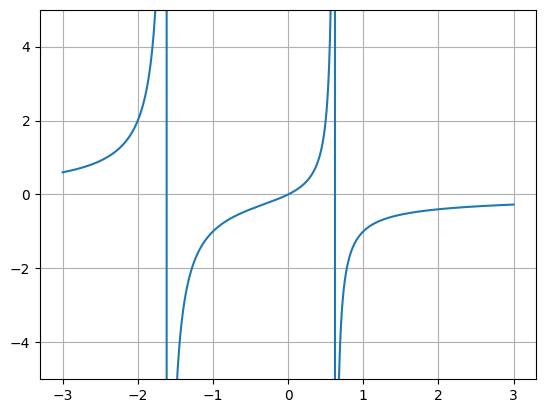

In [23]:
plt.plot(t,fnum(t))
plt.ylim((-5,5))
plt.grid()

It is important to understand that the function itself does not have much to do with our original sequenz. It just happens to have the sequence as coefficients in the expantion. As we can see our functions has to poles. That are where the characteristic polynomial \$ x^2 +x -1 \$ is zero. The roots of this polynomial. In our case this is:



In [47]:
r=solve(-1+x+x**2)
r

In [48]:
r1,r2=r
r1

In [49]:
N(r1)

In [50]:
N(r2)

These roots indeed play an important role in the solution of our problem. As we have seen above we can use long division to find data points (or in our case we can just simply follow the recursive formular for adding the last to values to get the next one), but what if we want to find a **closed form** for all elements of the sequence. A formular where we plug in n, e.g. a very larg n, say \$ 1 000 000 \$ and immediately get an answer without having to calculate the values before?

If we look at 

$$ f(x) = \frac{1}{1-x-x^2} $$ 

We can split that ap with partial fraction decomposition:

$$ f(x) = \frac{1}{1-x-x^2} = \frac{A}{x-r_1} + \frac{B}{x-r_2} = \frac{-\frac{A}{r_1}}{1-\frac{x}{r_1}} + \frac{-\frac{B}{r_2}}{1-\frac{x}{r_2}} $$ 

With some constants A and B that can be fuond by partial fraction decompostition and \$ r_1, r_2 \$ which are the roots of the characteristic polinomial.

Since we know that a generating function 

$$ \frac{1}{1-c x} = 1 +cx +c^2 x^2 + \ldots + c^n x^n + \ldots $$


The partial fraction composition will give us a formular for \$ F_n \$ 



In [28]:
series(1/(1-c*x),x)

In [29]:
r1

In [30]:
r2

In [31]:
f=x/(1-x-x**2)
f


In [53]:
series(f)

In [38]:
A,B=symbols("A B")
eq1=f-A/(1-x/r1)-B/(1-x/r2)

In [39]:
eq1.subs(x,0)

In [41]:
eq2=eq1.subs(A,-B)

In [43]:
solve(eq2.subs(x,1),B)[0]

In [44]:
B=solve(eq2.subs(x,1),B)[0]

In [45]:
A=-B

In [46]:
A


This must be equal to -1 so \$ A=-B \$

In [33]:
pd.subs(B,-A)

In [34]:
A=-1/sqrt(5)
B=-A
A


In [52]:
check=A/(1-x/r1)+B/(1-x/r2)
simplify(check)

In [64]:
for i in range(10):
    print(N( A/r1**i +B/r2**i))

0
1.00000000000000
1.00000000000000
2.00000000000000
3.00000000000000
5.00000000000000
8.00000000000000
13.0000000000000
21.0000000000000
34.0000000000000


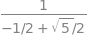

In [65]:
1/r1

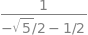

In [66]:
1/r2

In [72]:
N(1/r1)

In [73]:
A


In [36]:
n=symbols("n")

In [37]:
gr=(1+sqrt(5))/2

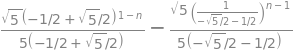

In [38]:
FN=-A/r1*(1/r1)**(n-1)-B/r2*(1/r2)**(n-1)
FN

In [39]:
binet=(gr**n-(1-gr)**n)/sqrt(5)
binet

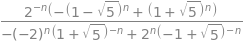

In [40]:
simplify(binet/FN)

In [41]:
FNfun=lambdify(n,FN)
bifun=lambdify(n,binet)

In [42]:
bifun(9)

In [43]:
FNfun(9)

### Exponential functions as a solution also include trigonometric functions

Note that when \$ \lambda_1 \$ is a solution of the characteristic polynomial that appears in the denominator of the generating functions we can construct solutions by including a term \$ \lambda_1^n \$ by scaling the contributions of this exponential functions we can fit it to the initial conditions. Also note that there could be complex solutions. Instead of writing \$ \lambda_1^n \$ we could write \$ e^{s_1 n} \$ with \$ s_1 = ln(\lambda_1) \$ and in the case where \$ s_1=i \alpha_1 \$ our solutions will be periodic functions. For real polynomials the complex solutions will come in conjugate pairs where e.g. \$ s_2=-i \alpha_1 \$ so that the complex part cancels in the solution that then can be expressed in terms of \$ sin(\alpha_1 n ) \$n and \$ cos(\alpha_1 n) \$ . We will look at a periodic function later.


### expressing negative values of n

Up until now our series always started with \$ n=0 \$ If we have a few (finite) terms of negative values we can easily express them as negative powers of x. E.g.

$$ 4x^{-2} + 2 x^{-1} + 1 + \frac{x}{2} + \frac{x^2}{4} + \ldots $$

Would be a geomertric serires that starts with 2 steps *in the past*. But a problem would arise if we would have an infinit amount of elements at negative position. E.g. if we would like to express a series like:

$$ f(x) = \ldots + x^{-3} + x^{-2} + x^{-1} $$ 

We could write this as:

$$ x f(x) - f(x) = 1 $$

or 

$$ f(x) = \frac{-1}{1-x} $$ 

Which is, except for the **sign** the same function as the on that represents the series

$$ 1 + x + x^2 + x^3 + \ldots $$ 

So if we would want to represent a series that goes into both direction we would have some **ambiguity** on how to represent it. One way to give a hint on the direction would be to tll the region of convergence (**RoC**). If this seriers converges for \$|x| < 1 \$  then we mean the positive side and if it converges for \$|x| > 1 \$ then we mean the series of negative powers. Of course, if like in the case of the Fibonacci sequence our \$|x| \$ needs to be smaller then term that defines the growth.


# The Z-Transform and its Connection to the Laplace Transform

The Z-Transform is extremely similar to generating function. The only difference is that it represents the values not in powers of \$ x \$ but in terms of powers of \$ z^{-1} \$ 

This is kind of a historic curiosity. That all this has been existing so long in parallel and is not often noted. The Z-Transform is heavily used in signal processing and electrical engeering where the generating function is more at home at math and statistics. I assume both methods have been independently invented. For electrical engeers where already heavily using the Laplace transform. The Laplace transform of a dirac spike \$ \delta(t-T) \$ at time \$ T \$  is \$ e^{sT} \$. Representing the series as a series of such spikes that are in intervalls of T then give a sum of terms \$ e^{n s T} \$ and when we replace \$ e^{s T}=z \$ we get the Z-Transform. So in the head of the engneer there is not only a seriers of values but always a signal. Want a signal that is a series of steps instead of spikes? Just multiply the Laplace Transform with \$ \frac{1}{s} (1-e^{- s T}) \$ 

Having the relation to real signals is of course important when you do signal processing. Still, who ever invented this could have choosen the same size. Laplace himself appreantly used generating function and the current form of the Laplace transform came to be used only after WW2.

For consistance I will continue to use generating functions instead of the Z-Transform here.


### Complex Solutions of the Characteristic Polynomial

Let's flip a sign in the equation of the **Fibonacci Sequence** and get a series of differences:

$$ F_{n}=F_{n-1}-F_{n-2} $$  $$ F_0=1,  F_1=2 $$

Or transfered into the domain of the generating Functions 

$$ f= f x - f x^{2} $$ 

And thus:

$$ f*(x^2 - x+ 1) = x + 1 $$ 

(Remember the poli

In [44]:
f=(1+x)/(x*x-x+1)
f

In [45]:
f.series(x,0,15)

Clearly we see a period of 6. Thus we should expect a complex root in our characteristic polinomial and since the values are overall neither growing nor shringing we should expect a magnitude of 1:

In [46]:
r=solve(x*x-x+1)
r

In [47]:
r1,r2=r
abs(r1)

In [48]:
arg(r1)

Thus we should be able to represent the values of our sequence with powers of \$ e^{i\frac{pi}{3}} \$  and \$ e^{-i\frac{pi}{3}} \$ 

In [49]:
A,B,alpha=symbols("A B alpha")
pd=expand(A*(x-r2)+B*(x-r1))
pd

In [50]:
pd=simplify(pd.subs(B,1-A))
pd

In [51]:
A=(1+1/2-sqrt(3)*1j/2)/(-sqrt(3)*1j)
B=1-A
A
any function in L2

In [52]:
expand(A*(x-r2)+B*(x-r1))

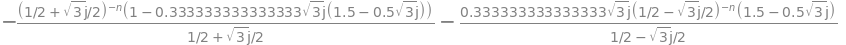

In [53]:
FN=-A/r1*(1/r1)**n-B/r2*(1/r2)**n
FN

In [54]:
FNfun=lambdify(n,FN)

In [55]:
res=[ np.round(FNfun(i),3) for i in range(10) ]
res

[(1+0j),
 (2+0j),
 (1+0j),
 (-1-0j),
 (-2-0j),
 (-1-0j),
 (1+0j),
 (2+0j),
 (1-0j),
 (-1-0j)]

In [56]:
[np.real(n) for n in res]

In [57]:
N(FN)

In [58]:
alpha=-arg(r1)
alpha

In [59]:
[round(N(exp(1j*alpha*(n-1))+exp(-1j*alpha*(n-1))),5)  for n in range(10)]

In [60]:
[round(N(2*cos(alpha*(n-1))),5)  for n in range(10)]

# lets look at the 1D case of our resistor network

If we have an module that takes and input sequence of values \$ X_n \$ and transforms it to build the differences and then outputs it we have an operation  $ Y_n = F_n - F_{n-1} \$ 

Or in the languagues of generating functions:

$$ y(x)=f(x)(1-x) $$

In [63]:
expand((1-x)**2)

If we apply the same operation twice we get 

$$y(x) = (x^2-2x+1)f(x) $$

$$ Y_n = F_n - 2*F_{n-1} + F_{n-2} $$

If we set all \$ Y_n \$ to zero expect for \$ Y_0 =1 \$ we have a similar equation then our 2D resistor network. 

$$ f(x) = \frac{1}{x^2-2x+1}  $$

This can be looked up in a table of generating functions. We know we have a double root at x=1. This also means that it is the folding of 2 step functions. Thut it should not suprise us that this gives

$$ F_{n} = n+1 $$

In [67]:
series(1/(x*x-2*x+1),x,0,10)

In [87]:
series((1+2*x)/(1+x**2),x,0,10)

In [78]:
series(x/(1+x*x))